In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

# 음수 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False

pd.set_option("display.max_rows", 10)
customer_churn_reviews = pd.read_csv("../../data/churn_data.csv", index_col = 0)
customer_churn_reviews

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [2]:
# 1.데이터 크기 확인
print("행, 열 크기:", customer_churn_reviews.shape)
print("전체 원소 개수:", customer_churn_reviews.size)
print("데이터프레임 요약:\n", customer_churn_reviews.info())

행, 열 크기: (7043, 20)
전체 원소 개수: 140860
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 


In [23]:
# 2. 결측치(Missing Value) 확인
missing_counts = customer_churn_reviews.isnull().sum()
missing_ratio = customer_churn_reviews.isnull().mean() * 100

print("\n컬럼별 결측지 합계: \n" , missing_counts)
print("\n결측치 비율(%): \n", missing_ratio)


컬럼별 결측지 합계: 
 gender            0
SeniorCitizen     0
                 ..
TotalCharges     11
Churn             0
Length: 20, dtype: int64

결측치 비율(%): 
 gender           0.000000
SeniorCitizen    0.000000
                   ...   
TotalCharges     0.156183
Churn            0.000000
Length: 20, dtype: float64


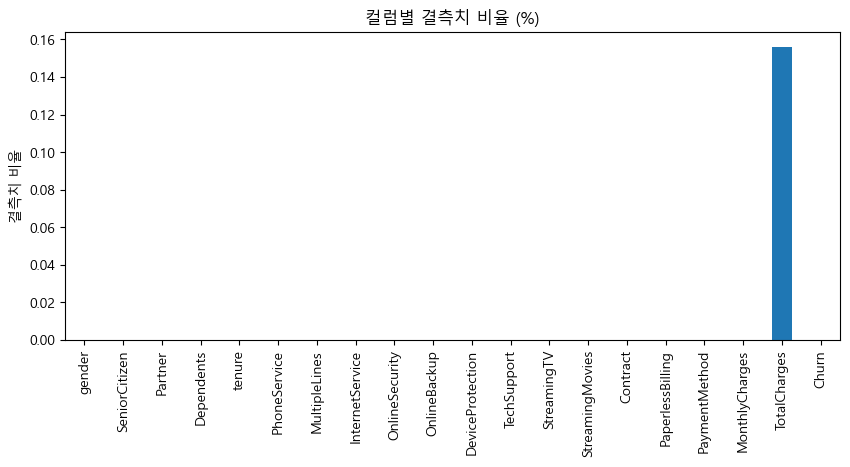

In [30]:
# 2-1 결측치 시각화
plt.figure(figsize=(10,4))
missing_ratio.plot(kind = 'bar')
plt.title("컬럼별 결측치 비율 (%)")
plt.ylabel("결측치 비율")
plt.show()

In [4]:
# 3. 컬럼별 데이터 타입 확인
print("\n컬럼별 데이터 타입:\n", customer_churn_reviews.dtypes)


컬럼별 데이터 타입:
 gender           object
SeniorCitizen     int64
                  ...  
TotalCharges     object
Churn            object
Length: 20, dtype: object


In [19]:
# 4. 수치형/범주형 컬럼 구분
numeric_cols = customer_churn_reviews.select_dtypes(include='number').columns
categorical_cols = customer_churn_reviews.select_dtypes(include='object').columns

# 5. 수치형 통계
numeric_summary = customer_churn_reviews[numeric_cols].describe().T

# 6️. 범주형 통계
categorical_summary = pd.DataFrame({
    'dtype': customer_churn_reviews[categorical_cols].dtypes,
    'non_null_count': customer_churn_reviews[categorical_cols].notnull().sum(),
    'null_count': customer_churn_reviews[categorical_cols].isnull().sum(),
    'null_percentage': customer_churn_reviews[categorical_cols].isnull().mean() * 100,
    'unique_count': customer_churn_reviews[categorical_cols].nunique(),
    'top': customer_churn_reviews[categorical_cols].mode().iloc[0]
})

# 7️. 요약 출력
print("\n--- 수치형 컬럼 요약 ---")
print(numeric_summary)
print("\n--- 범주형 컬럼 요약 ---")
print(categorical_summary)



--- 수치형 컬럼 요약 ---
                 count         mean          std    min     25%       50%  \
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.00     0.000   
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.000   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.45  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8500   118.75  
TotalCharges    3794.7375  8684.80  

--- 범주형 컬럼 요약 ---
                dtype  non_null_count  null_count  null_percentage  \
gender         object            7043           0              0.0   
Partner        object            7043           0              0.0   
...               ...             ...         ...              ...   
PaymentMethod  object            7043           0              0.0   
Churn          object            7043    

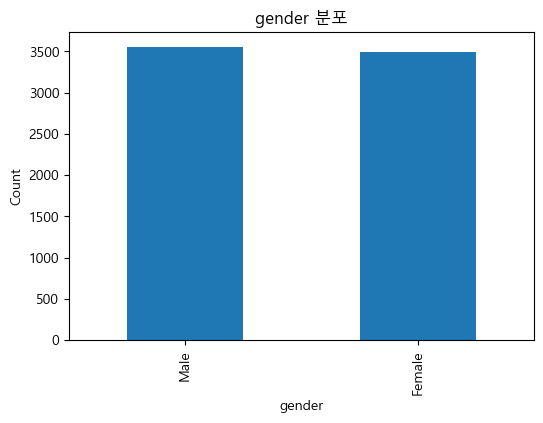

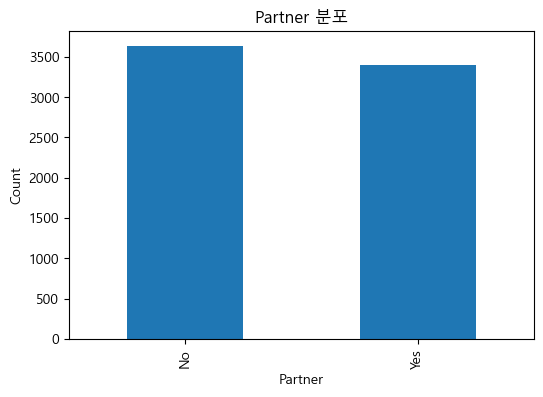

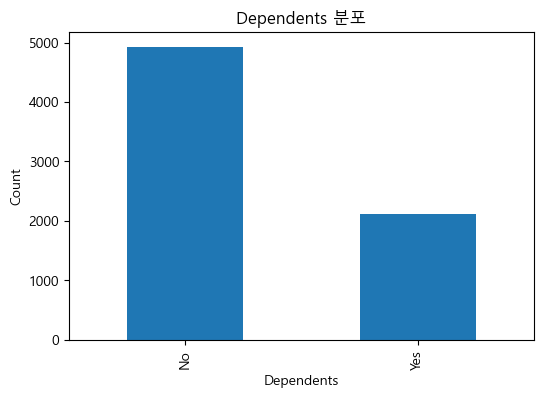

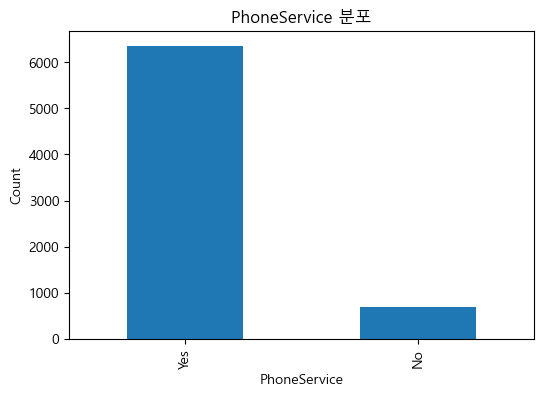

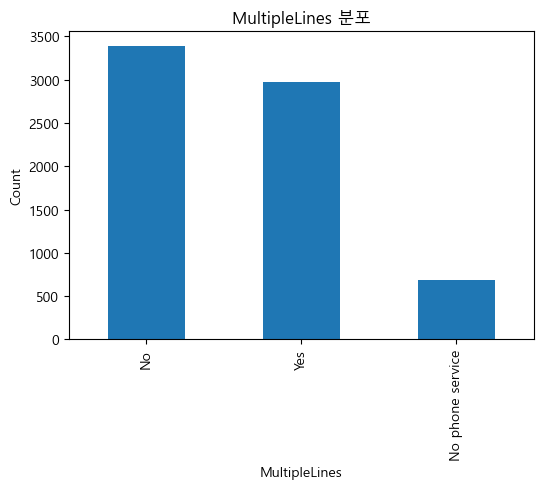

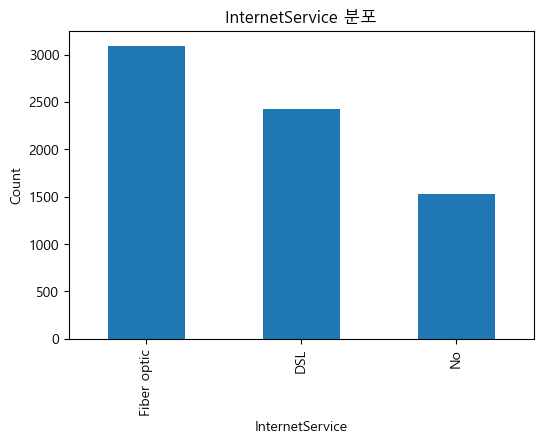

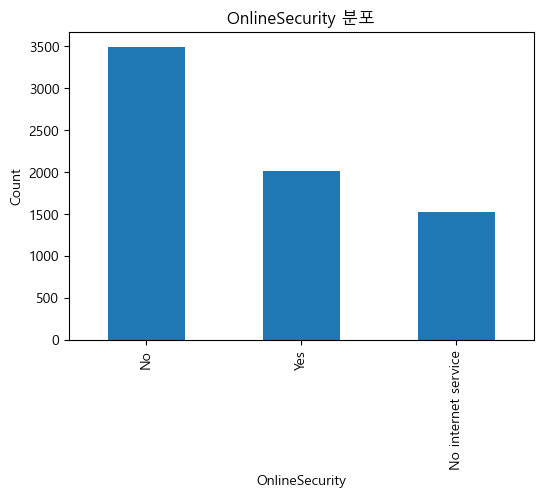

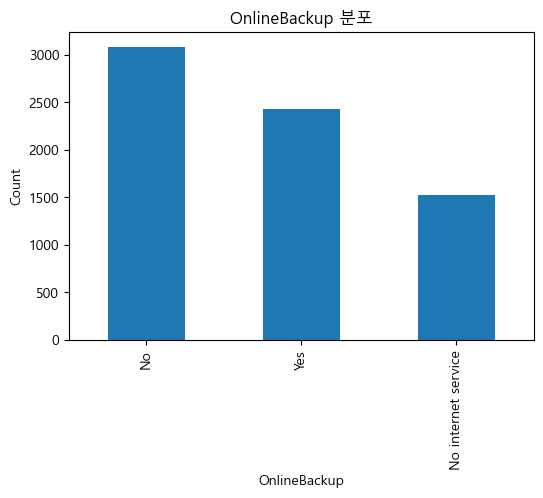

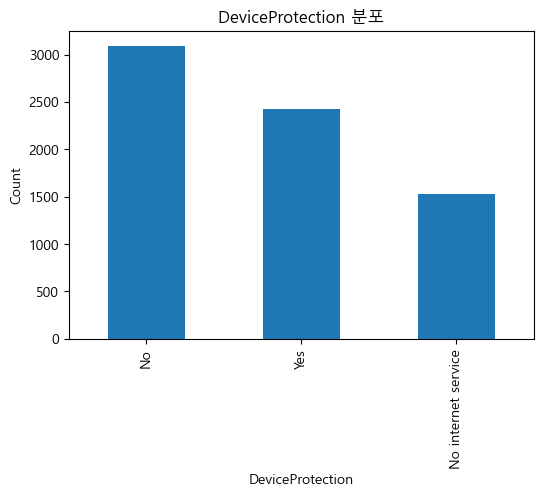

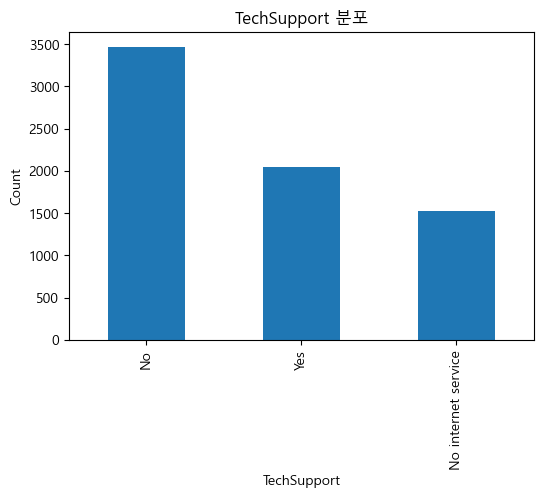

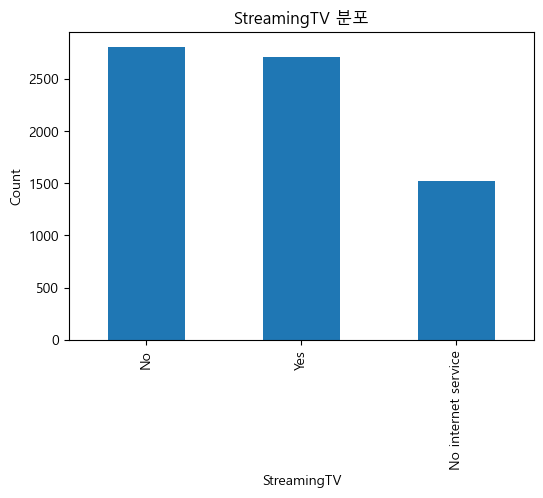

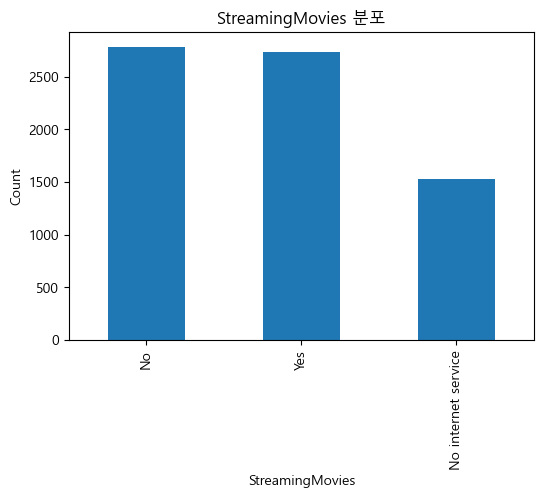

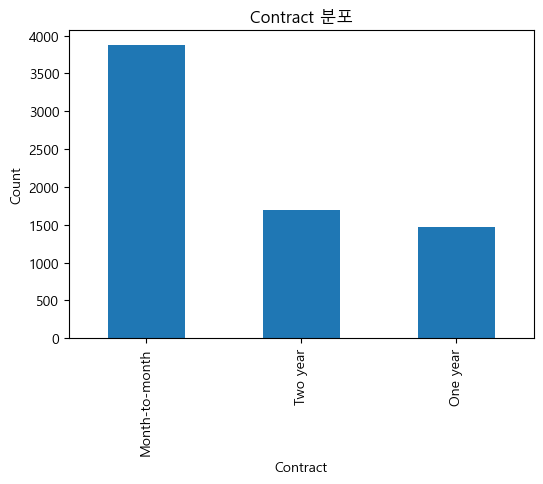

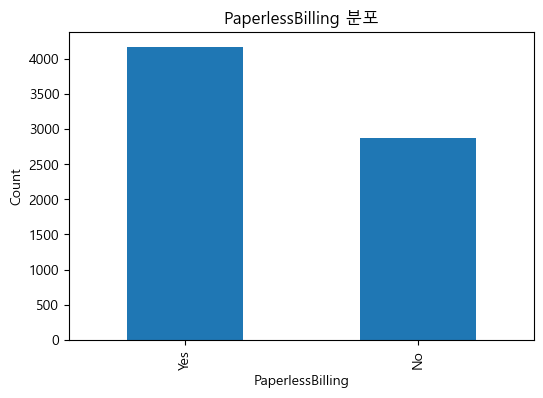

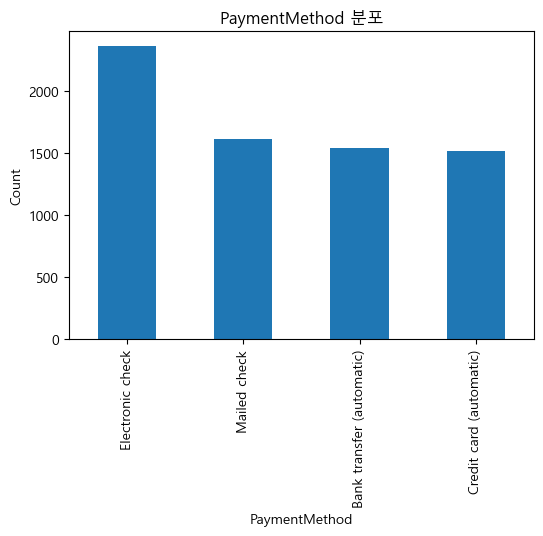

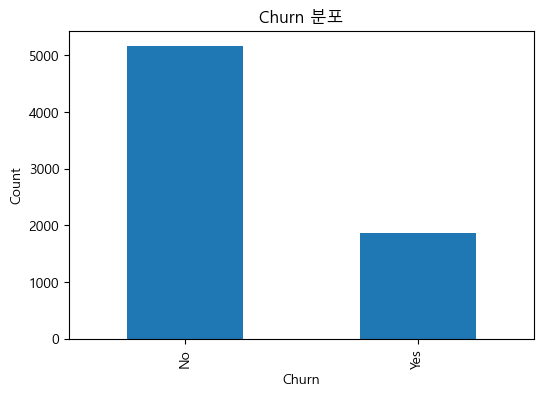

In [31]:
# 6-1 범주형 시각화
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    customer_churn_reviews[col].value_counts().plot(kind='bar')
    plt.title(f'{col} 분포')
    plt.ylabel("Count")
    plt.show()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
타겟 후보 컬럼: ['Churn']

--- Churn 분포---
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


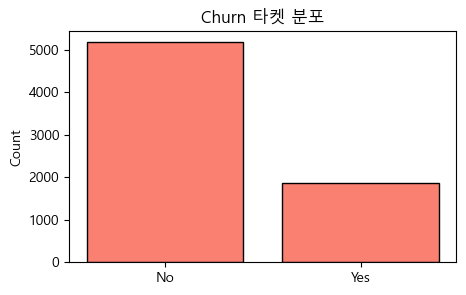

In [32]:
# 8. 타켓 컬럼 이름 확인
print(customer_churn_reviews.columns)

# 9. 후보 컬럼 찾기 (이름에 'churn', 'exit' 등이 포함된 컬럼)
target_candidates = [col for col in customer_churn_reviews.columns if 'churn' in col.lower() or 'exit' in col.lower()]
print("타겟 후보 컬럼:", target_candidates)

# 10.후보 컬럼별 값 분포 확인
for col in target_candidates:
    print(f"\n--- {col} 분포---")
    print(customer_churn_reviews[col].value_counts())
    print(customer_churn_reviews[col].value_counts(normalize=True) * 100)

    plt.figure(figsize=(5,3))
    counts = customer_churn_reviews[col].value_counts()
    plt.bar(counts.index, counts.values, color='salmon', edgecolor='black')
    plt.title(f'{col} 타켓 분포')
    plt.ylabel("Count")
    plt.show()
    